In [1]:
!pip3 install torch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [3]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [4]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

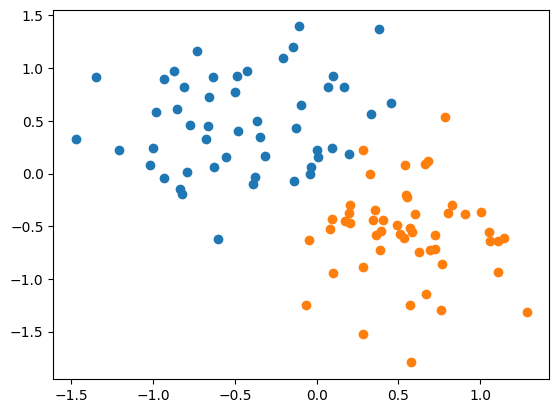

In [5]:
scatter_plot()

In [6]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

In [7]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [8]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [9]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

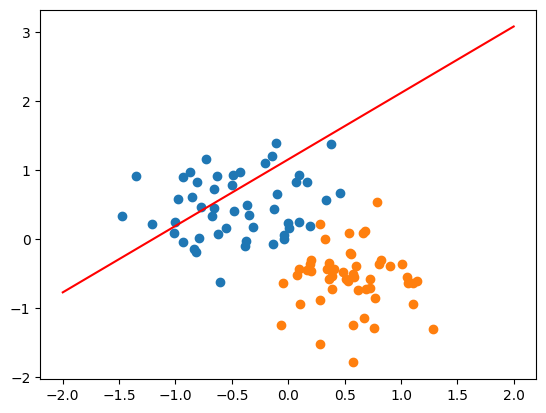

In [10]:
plot_fit('Initial Model')

In [11]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 0.6185115575790405
epoch: 1 loss 0.617464005947113
epoch: 2 loss 0.6164200305938721
epoch: 3 loss 0.6153795123100281
epoch: 4 loss 0.6143423318862915
epoch: 5 loss 0.6133086681365967
epoch: 6 loss 0.612278401851654
epoch: 7 loss 0.6112515330314636
epoch: 8 loss 0.6102280020713806
epoch: 9 loss 0.6092078685760498
epoch: 10 loss 0.6081911325454712
epoch: 11 loss 0.607177734375
epoch: 12 loss 0.6061676740646362
epoch: 13 loss 0.6051609516143799
epoch: 14 loss 0.6041575074195862
epoch: 15 loss 0.6031573414802551
epoch: 16 loss 0.6021605730056763
epoch: 17 loss 0.6011670231819153
epoch: 18 loss 0.6001767516136169
epoch: 19 loss 0.5991896986961365
epoch: 20 loss 0.5982059240341187
epoch: 21 loss 0.5972253680229187
epoch: 22 loss 0.5962480306625366
epoch: 23 loss 0.5952739119529724
epoch: 24 loss 0.5943029522895813
epoch: 25 loss 0.5933352112770081
epoch: 26 loss 0.5923705697059631
epoch: 27 loss 0.5914091467857361
epoch: 28 loss 0.5904508233070374
epoch: 29 loss 0.5894956588745